# Functional API of Keras

## Loading the packages

In [ ]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import utils
from sklearn import metrics as me

# GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

%matplotlib inline

1 Physical GPUs, 1 Logical GPUs


## Loading the raw data

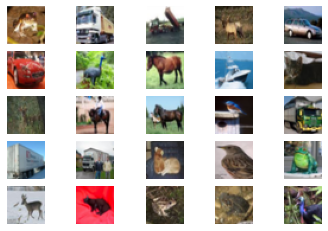

In [ ]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    # show the plot
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
CLASS_NAMES = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

show_imgs(X_train)

In [ ]:
# Normalize input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# Conversion to class vectors
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)

50000 train samples
10000 test samples


## Convolutional neural network - CNN

In [ ]:
# re-shape the data
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32')
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 256)       1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       590080    
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 256)       1024  

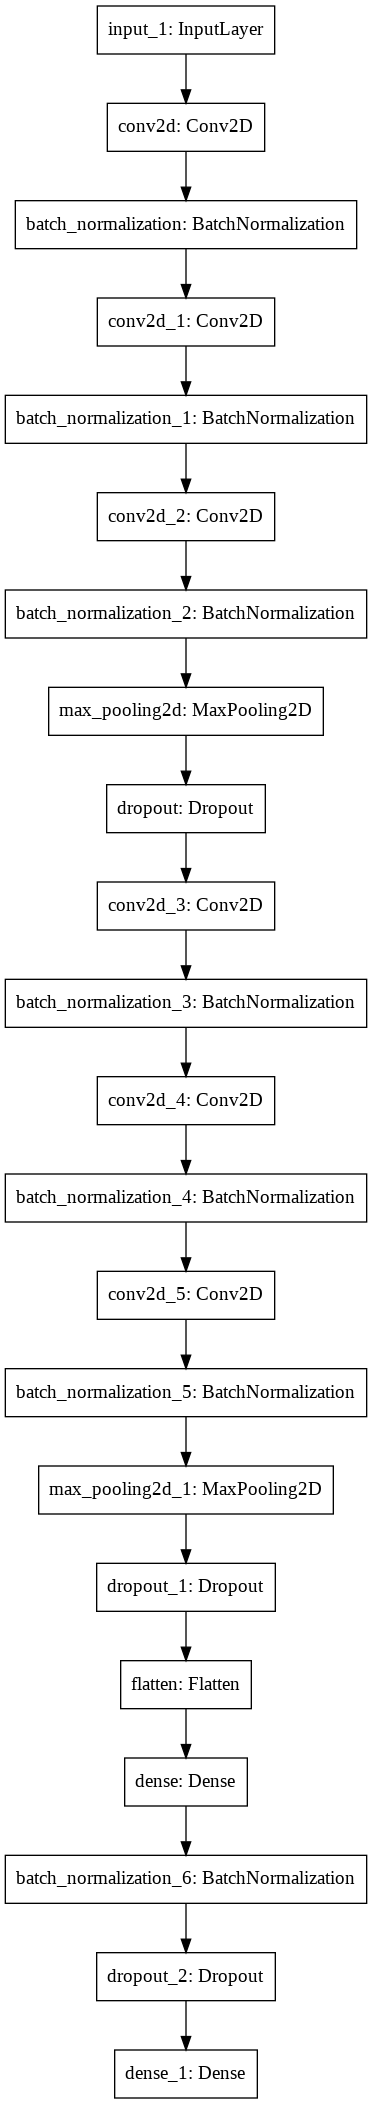

In [ ]:
# CNN - Keras functional API
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# input
visible = Input(shape=(32,32,3))

# 1. inner blocks
conv11 = Conv2D(256, kernel_size=3, activation='relu', kernel_initializer='lecun_normal')(visible)
bn11 = BatchNormalization()(conv11)
conv12 = Conv2D(256, kernel_size=3, activation='relu', kernel_initializer='lecun_normal')(bn11)
bn12 = BatchNormalization()(conv12)
conv13 = Conv2D(256, kernel_size=3, activation='relu', kernel_initializer='lecun_normal')(bn12)
bn13 = BatchNormalization()(conv13)
pool1 = MaxPooling2D()(bn13)
dout1 = Dropout(0.5)(pool1)

# 2. inner blocks
conv21 = Conv2D(256, kernel_size=3, activation='relu', kernel_initializer='lecun_normal')(dout1)
bn21 = BatchNormalization()(conv21)
conv22 = Conv2D(256, kernel_size=3, activation='relu', kernel_initializer='lecun_normal')(bn21)
bn22 = BatchNormalization()(conv22)
conv23 = Conv2D(256, kernel_size=3, activation='relu', kernel_initializer='lecun_normal')(bn22)
bn23 = BatchNormalization()(conv23)
pool2 = MaxPooling2D()(bn23)
dout2 = Dropout(0.5)(pool2)

# output block
flat = Flatten()(dout2)
hidden1 = Dense(512, activation='relu')(flat)
bn = BatchNormalization()(hidden1)
dout = Dropout(0.5)(bn)
output = Dense(10, activation='softmax')(dout)

model3 = Model(inputs=visible, outputs=output)

# summarize layers
print(model3.summary())
# plot graph
plot_model(model3, to_file='convolutional_neural_network.png')

In [ ]:
B = 128
E = 10
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
log = model3.fit(X_train, Y_train, batch_size=B, epochs=E,
                 verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 104s 246ms/step - loss: 2.2530 - accuracy: 0.3236 - val_loss: 2.1208 - val_accuracy: 0.3837
Epoch 2/10
391/391 [==============================] - 91s 232ms/step - loss: 1.1389 - accuracy: 0.6123 - val_loss: 0.9416 - val_accuracy: 0.6675
Epoch 3/10
391/391 [==============================] - 90s 229ms/step - loss: 0.8405 - accuracy: 0.7090 - val_loss: 0.8766 - val_accuracy: 0.7034
Epoch 4/10
391/391 [==============================] - 89s 229ms/step - loss: 0.6639 - accuracy: 0.7727 - val_loss: 0.7785 - val_accuracy: 0.7417
Epoch 5/10
391/391 [==============================] - 90s 229ms/step - loss: 0.5501 - accuracy: 0.8106 - val_loss: 0.6702 - val_accuracy: 0.7708
Epoch 6/10
391/391 [==============================] - 89s 229ms/step - loss: 0.4679 - accuracy: 0.8385 - val_loss: 0.7058 - val_accuracy: 0.7769
Epoch 7/10
391/391 [==============================] - 90s 229ms/step - loss: 0.3947 - accuracy: 0.8643 - val_loss: 0.6850 - val_a

In [ ]:
loss_test, metric_test = model3.evaluate(X_test, Y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 8s 23ms/step - loss: 0.6064 - accuracy: 0.8282
Test loss: 0.6064262986183167
Test accuracy: 0.8281999826431274


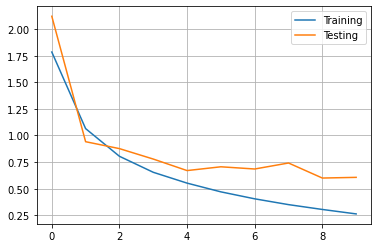

In [ ]:
plt.plot(log.history['loss'], label='Training')
plt.plot(log.history['val_loss'], label='Testing')
plt.legend()
plt.grid()

## Convolutional neural network - CNN with multiple path and shared input layer

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 30, 30, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 27, 27, 32)   3488        input_2[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 30, 30, 32)   0           conv2d_6[0][0]                   
____________________________________________________________________________________________

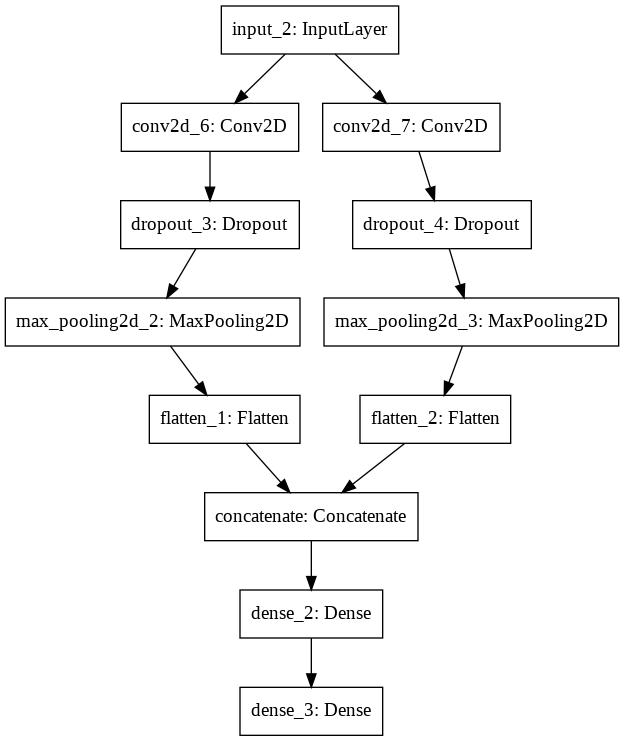

In [ ]:
# Shared Input Layer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, concatenate

# input layer
visible = Input(shape=(32, 32, 3))
# first feature extractor
conv1 = Conv2D(32, kernel_size=3, activation='relu')(visible)
drop1 = Dropout(0.2)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(drop1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(32, kernel_size=6, activation='relu')(visible)
drop2 = Dropout(0.2)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(drop2)
flat2 = Flatten()(pool2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(100, activation='relu')(merge)
# prediction output
output = Dense(10, activation='softmax')(hidden1)
model4 = Model(inputs=visible, outputs=output)
# summarize layers
print(model4.summary())
# plot graph
plot_model(model4, to_file='shared_input_layer.png')

In [ ]:
B = 128
E = 10
model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
log = model4.fit(X_train, Y_train, batch_size=B, epochs=E,
                 verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 7s 15ms/step - loss: 1.8644 - accuracy: 0.3604 - val_loss: 1.3111 - val_accuracy: 0.5480
Epoch 2/10
391/391 [==============================] - 6s 15ms/step - loss: 1.2777 - accuracy: 0.5566 - val_loss: 1.2202 - val_accuracy: 0.5813
Epoch 3/10
391/391 [==============================] - 6s 14ms/step - loss: 1.1175 - accuracy: 0.6111 - val_loss: 1.2180 - val_accuracy: 0.5758
Epoch 4/10
391/391 [==============================] - 6s 14ms/step - loss: 1.0088 - accuracy: 0.6523 - val_loss: 1.1745 - val_accuracy: 0.5983
Epoch 5/10
391/391 [==============================] - 6s 14ms/step - loss: 0.9173 - accuracy: 0.6815 - val_loss: 1.0646 - val_accuracy: 0.6268
Epoch 6/10
391/391 [==============================] - 6s 14ms/step - loss: 0.8410 - accuracy: 0.7058 - val_loss: 1.0159 - val_accuracy: 0.6477
Epoch 7/10
391/391 [==============================] - 6s 14ms/step - loss: 0.7693 - accuracy: 0.7346 - val_loss: 1.1589 - val_accuracy: 0.6123

In [ ]:
loss_test, metric_test = model4.evaluate(X_test, Y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

In [ ]:
plt.plot(log.history['accuracy'], label='Training')
plt.plot(log.history['val_accuracy'], label='Testing')
plt.legend()
plt.grid()

## Conv neural network - CNN with multiple path, multiple features

In [ ]:
# Shared Input Layer

# input layer
visible = Input(shape=(32, 32, 3))
# first feature extractor
conv1 = Conv2D(32, kernel_size=3, activation='relu')(visible)
drop1 = Dropout(0.2)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(drop1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(32, kernel_size=3, activation='relu')(pool1)
drop2 = Dropout(0.2)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(drop2)
flat2 = Flatten()(pool2)
# third feature extractor
conv3 = Conv2D(32, kernel_size=3, activation='relu')(pool2)
drop3 = Dropout(0.2)(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(drop3)
flat3 = Flatten()(pool3)
# merge feature extractors
merge = concatenate([flat1, flat2, flat3])
# interpretation layer
hidden1 = Dense(100, activation='relu')(merge)
# prediction output
output = Dense(10, activation='softmax')(hidden1)
model5 = Model(inputs=visible, outputs=output)
# summarize layers
print(model5.summary())
# plot graph
plot_model(model5, to_file='shared_input_layer_multi_feat.png')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

B = 128
E = 10
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, 
                             monitor='val_accuracy',save_best_only=True, 
                             mode='auto')
model5.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
log = model5.fit(X_train, Y_train, batch_size=B, epochs=E,
                 verbose=1, validation_data=(X_test, Y_test), 
                 callbacks=[checkpoint])

In [ ]:
loss_test, metric_test = model5.evaluate(X_test, Y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0078 - accuracy: 0.6559
Test loss: 1.0078258514404297
Test accuracy: 0.6559000015258789


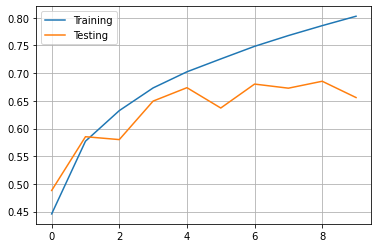

In [ ]:
plt.plot(log.history['accuracy'], label='Training')
plt.plot(log.history['val_accuracy'], label='Testing')
plt.legend()
plt.grid()